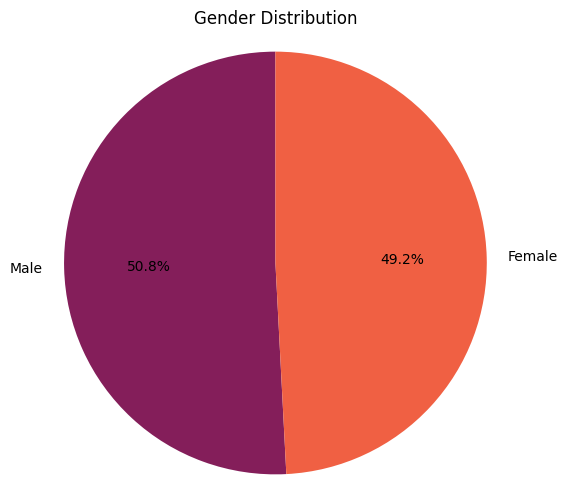

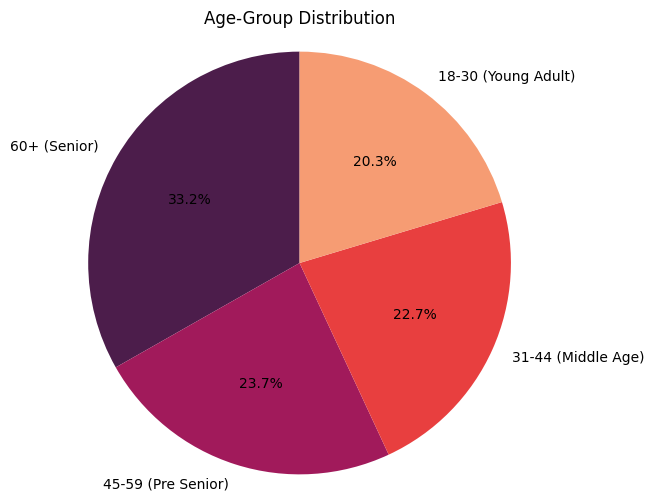

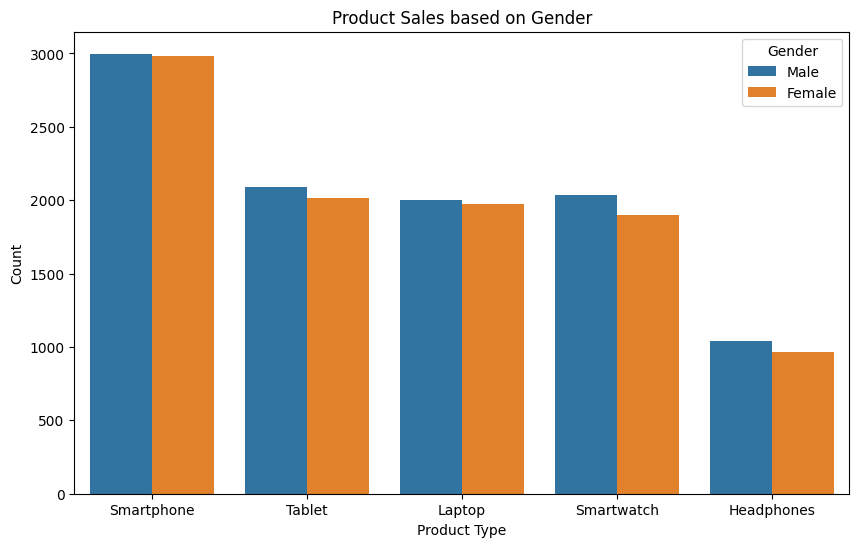

In [ ]:
import re
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print
from rich.table import Table
from rich.console import Console

df = pd.read_csv("labeled_customer_data.csv")

# 1. Gender - Pie Chart
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("rocket", len(gender_counts)),
)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

In [ ]:
# 2. Age Group - Pie Chart
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

age_counts = df["Age_Group"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("rocket", len(age_counts)),
)
plt.title("Age-Group Distribution")
plt.axis("equal")
plt.show()

In [ ]:
# 3. Product Sales based on Gender - Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Product Type", hue="Gender")
plt.title("Product Sales based on Gender")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()